# Fase 3 y 4
## Ian Galicia
## A01781528

# Fase 3: Simulación de la geometría de ciudad y estructura de datos para las personas

## Para cada problema en la fase 3:

- Dado un valor inicial de N, crear 3 variables para contar el número inicial de
infectados, de susceptibles y de recuperados. Las variables deben ser tales que
N=I+S+R y que haya por lo menos una persona infectada. Inicialmente no hay
recuperados (R=0).

- Crear 2 variables para definir el “radio” de infección r, que representará la
distancia para poderse infectar, r=0.6), y para la razón de recuperación.

- Crear una variable categórica (factor variable) que represente el estado de la
persona (suceptible, infectada o recuperada).

- Crear una estructura de datos (dataframe o varios arreglos) para representar las
variables “posición x”, “posición y”, ”estado”, “id único de la persona” y “número
de iteración” de las N personas de manera que haya I personas infectadas, S
susceptibles y R recuperados.

- Escribir una función que revise la distancia euclidiana entre dos puntos y regrese
TRUE (o 1) si la distancia es menor que r y regrese FALSE (o 0) si la distancia
es mayor o igual que r.

## Fase 4: Iteración, movimiento y representación gráfica

En esta fase, usará cada estudiante la configuración de problema seleccionado
durante la fase anterior. Para este problema:

Establecer el número de iteraciones (proporcionales al tiempo y considerando una velocidad de movimiento realista).

Hacer un ciclo para un número apropiado de iteraciones. En cada iteración:

- Crear dos vectores de tamaño N donde almacenar los desplazamientos de las N personas. El desplazamiento deberá simularse nuevamente utilizando números aleatorios con distribución normal para describir cuánta distancia y en qué dirección se mueve un individuo.

- El vector de desplazamiento individual debe ser sumado a la posición de cada individuo.

- Crear dos estructuras de datos para almacenar en la primera la estructura de datos para todos los infectados de la iteración actual y en otra lo datos de la iteración siguiente.

- Para cada persona de la estructura de datos actual verificar si está a una distancia de los infectados tal que se pueda enfermar. Si la distancia está por debajo del valor asignado de r cambiar su estado a “infectado”.

- Asociar a cada persona infectada un número aleatorio entre 0 y 1. Si el número es menor que la tasa de recuperación, cambiar el estado de “Infectado” a “Recuperado”.

- Actualizar la iteración en la estructura de datos y juntarla a la estructura de la iteración anterior.

Crear una animación donde cada “frame” corresponde a una iteración. Puede usar plotly o una herramienta similar para este punto. 

# 

### Problema 1:

* Crear una ciudad cuadrada donde cada lado tiene tamaño D con distribución uniforme de personas.

* Crear un arreglo de posiciones x, y de posiciones y considerando N personas. Asignar una posición inicial para cada una de las personas de la población por medio de un número aleatorio uniforme.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

N = 300  # Cantidad de personas
D = 100  # Tamaño de la ciudad

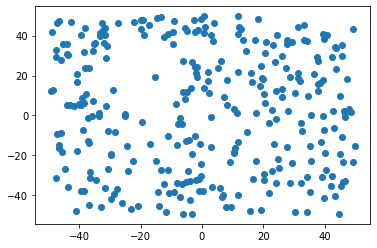

In [2]:
pd.set_option('display.max_rows', None)

# Crear los arrays xpos, ypos usando np.random.uniform() que representan las coordinadas (xpos,ypos) de las N personas
# Pueden elegir los valores límite considerando que las N personas deben quedarse adentro de la ciudad

xpos = np.random.uniform(-D/2,D/2,N)
ypos = np.random.uniform(-D/2,D/2,N)

plt.scatter(xpos,ypos) #Plot para visualizar las personas

In [3]:
#Definimos la condición (status) de las personas como "susceptible", "infected","recovered","dead" 

S = 'susceptible'
I = 'infected'
R = 'recovered'

#Condiciones iniciales:
I0  = 10 #número infectados inicial
R0 = 0 #número recuperados inicial
S0 = N-I0-R0 #Número de susceptibles inicial

### Definir un array donde aparezca un número de elementos "susceptible" igual a S0, un número de elementos "infected" igual a I0,
### un número de elementos "recovered" igual a R0 y un número de elementos "dead" igual a D0
## Sug.:usar np.repeat()

status1 = np.repeat(S,S0)
status2 = np.repeat(I,I0)
status3 = np.repeat(R,R0)

status = np.concatenate((status1, status2, status3))

### Crear un array de N elementos que contenga valores de 1 a N
id = np.array(range(1,N+1))

## Escribir una función que mide la distancia euclidiana entre dos puntos A=(x1,y1) y B=(x2,y2) y 
###regresa True si la distancia es menor que el radio de infección "infection_radius" definido arriba

def infec(A,B,inf_rad):
    dist = math.sqrt((A[0]-B[0])**2 + (A[1]-B[1])**2)
    v = False
    if dist < inf_rad:
        v = True
    return v

In [4]:
### Crear un array de N elementos iguales a 0 (usar np.repeat())
iteration = np.repeat(0,N)

## Aquí se crea un dataframe con las columnas 'xpos', 'ypos', 'status','iteration' y 'id'
df = pd.DataFrame()
df['xpos']=xpos
df['ypos']=ypos
df['status']=status
df['status'] = df['status'].astype('category')
df['iteration']=iteration
df['id']=id

n_iter = 100 # Número de iteraciones
infection_radius = 0.6  # distancia para decidir si una persona se infecta o no
recovery_rate = 0.0006  # razón de recuperación


df_I = pd.DataFrame() # Dataframe de infectados
df_I = df_I.append(df.loc[df['status']==I])

print(df)

for i in range(n_iter):
    v1 = np.random.normal(0, 2, N)
    v2 = np.random.normal(0, 2, N)
    Inf_xp = list(df_I['xpos'])
    Inf_yp = tuple(df_I['ypos'])
    
    for n in range(N):
        xpos[n] = xpos[n] + v1[n]
        ypos[n] = xpos[n] + v2[n]
        iteration[n] = iteration[n]+1
        c1 =(xpos[n],ypos[n])
        
        for j in range(len(df_I)):
            c2 = (Inf_xp[j], Inf_yp[j])
            
            if infec(c1, c2, infection_radius) == True:
                pass

    df['iteration'] = iteration
    df['xpos'] = xpos
    df['ypos'] = ypos
    
print(df)

          xpos       ypos       status  iteration   id
0    10.604227 -16.137460  susceptible          0    1
1   -22.556620 -22.989448  susceptible          0    2
2   -41.134352 -48.131980  susceptible          0    3
3    10.323656 -18.233835  susceptible          0    4
4   -32.856370 -45.801529  susceptible          0    5
5    29.429557 -23.894326  susceptible          0    6
6    -6.252011 -49.399512  susceptible          0    7
7    37.905232  27.047664  susceptible          0    8
8   -27.380149  46.445275  susceptible          0    9
9    45.187649 -35.489930  susceptible          0   10
10   39.063026 -30.888931  susceptible          0   11
11  -45.635893 -18.178594  susceptible          0   12
12   44.656667 -49.215920  susceptible          0   13
13   -9.224870  47.164178  susceptible          0   14
14  -29.758504 -19.838891  susceptible          0   15
15   23.978596 -33.649442  susceptible          0   16
16   18.897596  14.696998  susceptible          0   17
17  -11.24

          xpos       ypos       status  iteration   id
0   -21.675183 -20.294142  susceptible        100    1
1   -52.386430 -52.647623  susceptible        100    2
2   -27.830672 -22.801931  susceptible        100    3
3    -2.597054  -3.706645  susceptible        100    4
4   -27.597690 -25.640481  susceptible        100    5
5    38.228180  33.981622  susceptible        100    6
6   -10.094030 -10.063147  susceptible        100    7
7    29.747765  29.232764  susceptible        100    8
8   -20.162580 -21.587677  susceptible        100    9
9    35.779097  34.826683  susceptible        100   10
10   37.938716  34.582678  susceptible        100   11
11  -56.514401 -57.930918  susceptible        100   12
12   12.904472  12.617028  susceptible        100   13
13    4.515917   3.954551  susceptible        100   14
14  -24.536034 -25.225234  susceptible        100   15
15   41.399710  41.365212  susceptible        100   16
16   -7.669562  -7.364756  susceptible        100   17
17   -1.88

### Problema 2:

* Crear una ciudad circular de radio D/2 con distribución uniforme de personas, misma que no puede generarse de manera estándar sino que debe considerarse una distribución modificada tal como se ve en https://programming.guide/random-point-within-circle.html. Crear un arreglo de posiciones x, y de posiciones y considerando N personas. Asignar una posición inicial aleatoria para cada una de las personas de la población.

In [5]:
N = 300  # Cantidad de personas
D = 100  # Tamaño de la ciudad

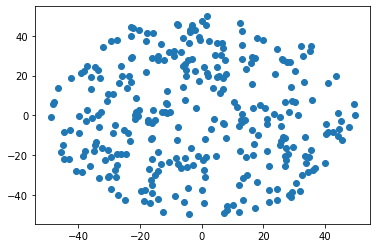

In [6]:
def fcos(x):
    return math.cos(x)

def fsin(x):
    return math.sin(x)

R = D/2 #radio de la distribución

### Generar N valores aleatorios entre 0 y 1 con la función np.random.uniform() y multiplicarlos por 2*math.pi
### para generar valores aleatorios de ángulos entre 0 y 2*Pi

alpha = np.random.uniform(0,1,N)*2*math.pi

### Generar N valores del radio r como R*np.sqrt(d), donde d son N aleatorios entre 0 y 1 generados con np.random.uniform()
### Se usa la raíz cuadrada para generar una distribución circular uniforme, si no saldría una distribución con aros concéntricos.

d = np.random.uniform(0,1,N)
r = R * np.sqrt(d)

xa = list(map(fcos,alpha))
ya = list(map(fsin,alpha))

### Convertir de coordenadas polares a cartesianas para generar las posiciones (xpos, ypos) de las N personas
xpos = r*np.array(xa)
ypos = r*np.array(ya)
plt.scatter(xpos,ypos)

In [7]:
#Definimos la condición (status) de las personas como "susceptible", "infected","recovered","dead" 

S = 'susceptible'
I = 'infected'
R = 'recovered'

#Condiciones iniciales:
I0  = 2 #número infectados inicial
R0 = 0 #número recuperados inicial
S0 = N-I0-R0 #Número de susceptibles inicial

### Definir un array donde aparezca un número de elementos "susceptible" igual a S0, un número de elementos "infected" igual a I0,
### un número de elementos "recovered" igual a R0 y un número de elementos "dead" igual a D0
## Sug.:usar np.repeat()

status1 = np.repeat(S,S0)
status2 = np.repeat(I,I0)
status3 = np.repeat(R,R0)

status = np.concatenate((status1, status2, status3))

### Crear un array de N elementos que contenga valores de 1 a N
id = np.array(range(1,N+1))

## Escribir una función que mide la distancia euclidiana entre dos puntos A=(x1,y1) y B=(x2,y2) y 
###regresa True si la distancia es menor que el radio de infección "infection_radius" definido arriba

def infec(A,B,inf_rad):
    dist = math.sqrt((A[0]-B[0])**2 + (A[1]-B[1])**2)
    v = False
    if dist < inf_rad:
        v = True
    return v

In [8]:
### Crear un array de N elementos iguales a 0 (usar np.repeat())
iteration = np.repeat(0,N)

## Aquí se crea un dataframe con las columnas 'xpos', 'ypos', 'status','iteration' y 'id'
df = pd.DataFrame()
df['xpos']=xpos
df['ypos']=ypos
df['status']=status
df['status'] = df['status'].astype('category')
df['iteration']=iteration
df['id']=id

n_iter = 100 # Número de iteraciones
infection_radius = 0.6  # distancia para decidir si una persona se infecta o no
recovery_rate = 0.0006  # razón de recuperación


df_I = pd.DataFrame() # Dataframe de infectados
df_I = df_I.append(df.loc[df['status']==I])

print(df)

for i in range(n_iter):
    v1 = np.random.normal(0, 2, N)
    v2 = np.random.normal(0, 2, N)
    Inf_xp = list(df_I['xpos'])
    Inf_yp = tuple(df_I['ypos'])
    
    for n in range(N):
        xpos[n] = xpos[n] + v1[n]
        ypos[n] = xpos[n] + v2[n]
        iteration[n] = iteration[n]+1
        c1 =(xpos[n],ypos[n])
        
        for j in range(len(df_I)):
            c2 = (Inf_xp[j], Inf_yp[j])
            
            if infec(c1, c2, infection_radius) == True:
                pass

    df['iteration'] = iteration
    df['xpos'] = xpos
    df['ypos'] = ypos
    
print(df)

          xpos       ypos       status  iteration   id
0   -37.787495 -17.676731  susceptible          0    1
1    29.407323   7.057457  susceptible          0    2
2    -2.905215 -24.908477  susceptible          0    3
3     1.739733  21.297297  susceptible          0    4
4     0.173154 -37.576111  susceptible          0    5
5    31.422008   0.189316  susceptible          0    6
6   -30.407818 -30.960279  susceptible          0    7
7   -14.121377 -27.602240  susceptible          0    8
8   -21.467651   1.897852  susceptible          0    9
9    31.781756 -38.016130  susceptible          0   10
10  -13.110196 -24.466214  susceptible          0   11
11   -4.631580 -25.804745  susceptible          0   12
12   -5.096911  22.994767  susceptible          0   13
13  -33.198950  -5.619676  susceptible          0   14
14   -2.166750  42.634468  susceptible          0   15
15   26.937603 -20.450343  susceptible          0   16
16  -14.168086 -18.274391  susceptible          0   17
17  -39.71

          xpos       ypos       status  iteration   id
0    -4.332236  -3.983378  susceptible        100    1
1    63.791253  61.836596  susceptible        100    2
2     7.646442   7.769992  susceptible        100    3
3     3.781376   4.395944  susceptible        100    4
4    33.027620  34.302214  susceptible        100    5
5    28.319612  25.568968  susceptible        100    6
6   -19.428367 -18.736460  susceptible        100    7
7   -10.756669 -10.414023  susceptible        100    8
8   -16.157482 -15.369217  susceptible        100    9
9    17.494455  19.518765  susceptible        100   10
10  -33.218114 -30.963999  susceptible        100   11
11  -13.141169 -13.075009  susceptible        100   12
12  -29.475978 -29.346997  susceptible        100   13
13  -34.845583 -35.088337  susceptible        100   14
14   -4.260743  -4.955678  susceptible        100   15
15   44.073992  42.926626  susceptible        100   16
16  -30.601087 -28.986993  susceptible        100   17
17  -13.97

### Problema 3:

* Crear una ciudad cuadrada de lado D en la que las personas están distribuidas en forma de “cluster” en donde hay una preferencia de las personas para estar ubicadas en cierta zona dentro de la ciudad. Para esto, defina un lugar de preferencia en forma aleatoria x0, y0 y determine la posición aleatoria de la posición de N personas distribuidas de acuerdo a una distribución normal.

* Considere la función de la distribución normal. Con esto, puede elegir coordenadas en x que se concentran alrededor de y0. Considere una desviación estándar de tamaño D/20.

In [9]:
N = 300  # Cantidad de personas
D = 100  # Tamaño de la ciudad

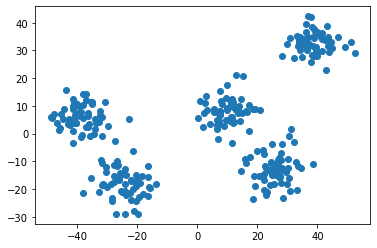

In [10]:
n_clusters = 5 #Para seleccionar el número de clusters
nn = N // n_clusters

### Usando np.random.uniform() generar las coordenadas de centro (x0,y0) de cada cluster (en número igual a n_clusters)
### Usar como límites los límites de la ciudad
x0 = np.random.uniform(-D/2,D/2,n_clusters)
y0 = np.random.uniform(-D/2,D/2,n_clusters)


###Aquí abajo se crean los arrays vacíos para las posiciones (xpos,ypos) de las N personas
xpos = np.zeros((n_clusters,nn))
ypos = np.zeros((n_clusters,nn))

### Por cada cluster (índice i),generar nn valores aleatorios xpos con distribución normal, usando np.random.normal(), 
### que tenga media igual a x0[i] y desviación estándar igual a D/20. Generar nn valores aleatorios ypos con distribución normal, usando np.random.normal(), 
### que tenga media igual a y0[i] y desviación estándar igual a D/20.
for i in range(n_clusters):
    xpos[i] = np.random.normal(x0[i], D/20, nn)
    ypos[i] = np.random.normal(y0[i], D/20, nn)

##En las líneas abajo se unen todos los xpos[i] y ypos[i] para crear un único array de xpos y ypos
xpos = np.reshape(xpos,(xpos.shape[0]*xpos.shape[1],))
ypos = np.reshape(ypos,(ypos.shape[0]*ypos.shape[1],))

plt.scatter(xpos,ypos)

In [11]:
#Definimos la condición (status) de las personas como "susceptible", "infected","recovered","dead" 

S = 'susceptible'
I = 'infected'
R = 'recovered'

#Condiciones iniciales:
I0  = 2 #número infectados inicial
R0 = 0 #número recuperados inicial
S0 = N-I0-R0 #Número de susceptibles inicial

### Definir un array donde aparezca un número de elementos "susceptible" igual a S0, un número de elementos "infected" igual a I0,
### un número de elementos "recovered" igual a R0 y un número de elementos "dead" igual a D0
## Sug.:usar np.repeat()

status1 = np.repeat(S,S0)
status2 = np.repeat(I,I0)
status3 = np.repeat(R,R0)

status = np.concatenate((status1, status2, status3))

### Crear un array de N elementos que contenga valores de 1 a N
id = np.array(range(1,N+1))

## Escribir una función que mide la distancia euclidiana entre dos puntos A=(x1,y1) y B=(x2,y2) y 
###regresa True si la distancia es menor que el radio de infección "infection_radius" definido arriba

def infec(A,B,inf_rad):
    dist = math.sqrt((A[0]-B[0])**2 + (A[1]-B[1])**2)
    v = False
    if dist < inf_rad:
        v = True
    return v

In [12]:
### Crear un array de N elementos iguales a 0 (usar np.repeat())
iteration = np.repeat(0,N)

## Aquí se crea un dataframe con las columnas 'xpos', 'ypos', 'status','iteration' y 'id'
df = pd.DataFrame()
df['xpos']=xpos
df['ypos']=ypos
df['status']=status
df['status'] = df['status'].astype('category')
df['iteration']=iteration
df['id']=id

n_iter = 100 # Número de iteraciones
infection_radius = 0.6  # distancia para decidir si una persona se infecta o no
recovery_rate = 0.0006  # razón de recuperación


df_I = pd.DataFrame() # Dataframe de infectados
df_I = df_I.append(df.loc[df['status']==I])

print(df)

for i in range(n_iter):
    v1 = np.random.normal(0, 2, N)
    v2 = np.random.normal(0, 2, N)
    Inf_xp = list(df_I['xpos'])
    Inf_yp = tuple(df_I['ypos'])
    
    for n in range(N):
        xpos[n] = xpos[n] + v1[n]
        ypos[n] = xpos[n] + v2[n]
        iteration[n] = iteration[n]+1
        c1 =(xpos[n],ypos[n])
        
        for j in range(len(df_I)):
            c2 = (Inf_xp[j], Inf_yp[j])
            
            if infec(c1, c2, infection_radius) == True:
                pass

    df['iteration'] = iteration
    df['xpos'] = xpos
    df['ypos'] = ypos
    
print(df)

          xpos       ypos       status  iteration   id
0   -21.325567 -28.077902  susceptible          0    1
1   -24.232912 -20.742280  susceptible          0    2
2   -31.911398 -10.535727  susceptible          0    3
3   -19.460904 -22.716116  susceptible          0    4
4   -27.656129  -2.764209  susceptible          0    5
5   -16.359731 -11.701023  susceptible          0    6
6   -21.434578  -6.225796  susceptible          0    7
7   -18.622448 -15.258248  susceptible          0    8
8   -13.673566 -18.330170  susceptible          0    9
9   -22.253621 -17.189291  susceptible          0   10
10  -19.231145 -17.851755  susceptible          0   11
11  -22.552277 -21.247500  susceptible          0   12
12  -21.446514 -19.974353  susceptible          0   13
13  -28.586215 -24.198327  susceptible          0   14
14  -32.972281 -20.991759  susceptible          0   15
15  -25.399681 -20.703967  susceptible          0   16
16  -22.011922 -24.087574  susceptible          0   17
17  -31.83

           xpos       ypos       status  iteration   id
0    -61.624422 -59.481114  susceptible        100    1
1     -5.644039 -10.405244  susceptible        100    2
2    -24.817961 -22.584753  susceptible        100    3
3    -50.542559 -51.820021  susceptible        100    4
4    -21.245657 -24.243152  susceptible        100    5
5    -29.509160 -28.231165  susceptible        100    6
6     -1.578557  -1.939751  susceptible        100    7
7     13.700500  13.592751  susceptible        100    8
8      0.376232   3.000952  susceptible        100    9
9    -24.207776 -26.669833  susceptible        100   10
10    -6.472534 -10.071856  susceptible        100   11
11   -37.444521 -36.136995  susceptible        100   12
12   -12.909856 -14.399798  susceptible        100   13
13    17.546273  17.617542  susceptible        100   14
14   -29.179067 -27.035454  susceptible        100   15
15   -39.616314 -34.497025  susceptible        100   16
16   -32.854287 -34.112830  susceptible        1

### Problema 4:

* Crear una ciudad circular de radio D/2 con distribución de personas en “cluster”. Considere la generación de números aleatorios en un círculo de acuerdo a https://programming.guide/random-point-within-circle.html.

* Considere un arreglo para posiciones x, y otro para posiciones y correspondientes a N personas que se concentran de acuerdo a una distribución normal en un ángulo y distancia al centro seleccionados de manera aleatoria.

In [13]:
N = 300  # Cantidad de personas
D = 100  # Tamaño de la ciudad

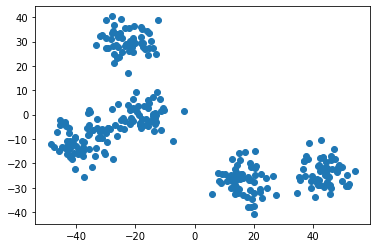

In [14]:
n_clusters = 5 #Para seleccionar el número de clusters
nn = N // n_clusters

R = D/2

##Generar aleatorios con distribución uniforme entre 0 y 1 (en número igual a n_clusters) 
##para el ángulo de cada cluster usando np.random.uniform() y multiplicándolo por 2*math.pi

alpha = np.random.uniform(0,1,n_clusters)* (2*math.pi)

### Generar los radios r como R*np.sqrt(d), donde d son aleatorios con distribución uniforme (en número igual a n_clusters) entre 0 y 1
###Se usa la raíz cuadrada para generar una distribución circular uniforme, si no saldría una distribución con aros concéntricos.

d = np.random.uniform(0,1,n_clusters)
r = R * np.sqrt(np.random.uniform(0,1,n_clusters))

### Calcular las posiciones del centro de cada clusters convirtiendo de coordenadas polares a coordenadas rectangulares

def fcos(x):
    return math.cos(x)

def fsin(x):
    return math.sin(x)

xa = list(map(fcos,alpha))
ya = list(map(fsin,alpha))

x0= r*np.array(xa)
y0 = r*np.array(ya)


### Se crean arrays para las posiciones
xpos = np.zeros((n_clusters,nn))
ypos = np.zeros((n_clusters,nn))

### Por cada cluster (índice i),generar nn valores aleatorios xpos con distribución normal, usando np.random.normal(), 
### que tenga media igual a x0[i] y desviación estándar igual a D/20. Generar nn valores aleatorios ypos con distribución normal, usando np.random.normal(), 
### que tenga media igual a y0[i] y desviación estándar igual a D/20.

for i in range(n_clusters):
    xpos[i] = np.random.normal(x0[i], D/20, nn)
    ypos[i] = np.random.normal(y0[i], D/20, nn)
    
###En las líneas abajo se unen todos los xpos[i] y ypos[i] para crear un único array de xpos y ypos

xpos = np.reshape(xpos,(xpos.shape[0]*xpos.shape[1],))
ypos = np.reshape(ypos,(ypos.shape[0]*ypos.shape[1],))

plt.scatter(xpos,ypos)

In [15]:
#Definimos la condición (status) de las personas como "susceptible", "infected","recovered","dead" 

S = 'susceptible'
I = 'infected'
R = 'recovered'

#Condiciones iniciales:
I0  = 2 #número infectados inicial
R0 = 0 #número recuperados inicial
S0 = N-I0-R0 #Número de susceptibles inicial

### Definir un array donde aparezca un número de elementos "susceptible" igual a S0, un número de elementos "infected" igual a I0,
### un número de elementos "recovered" igual a R0 y un número de elementos "dead" igual a D0
## Sug.:usar np.repeat()

status1 = np.repeat(S,S0)
status2 = np.repeat(I,I0)
status3 = np.repeat(R,R0)

status = np.concatenate((status1, status2, status3))

### Crear un array de N elementos que contenga valores de 1 a N
id = np.array(range(1,N+1))

## Escribir una función que mide la distancia euclidiana entre dos puntos A=(x1,y1) y B=(x2,y2) y 
###regresa True si la distancia es menor que el radio de infección "infection_radius" definido arriba

def infec(A,B,inf_rad):
    dist = math.sqrt((A[0]-B[0])**2 + (A[1]-B[1])**2)
    v = False
    if dist < inf_rad:
        v = True
    return v

In [16]:
### Crear un array de N elementos iguales a 0 (usar np.repeat())
iteration = np.repeat(0,N)

## Aquí se crea un dataframe con las columnas 'xpos', 'ypos', 'status','iteration' y 'id'
df = pd.DataFrame()
df['xpos']=xpos
df['ypos']=ypos
df['status']=status
df['status'] = df['status'].astype('category')
df['iteration']=iteration
df['id']=id

n_iter = 100 # Número de iteraciones
infection_radius = 0.6  # distancia para decidir si una persona se infecta o no
recovery_rate = 0.0006  # razón de recuperación

print(df)

df_I = pd.DataFrame() # Dataframe de infectados
df_I = df_I.append(df.loc[df['status']==I])

for i in range(n_iter):
    v1 = np.random.normal(0, 2, N)
    v2 = np.random.normal(0, 2, N)
    Inf_xp = list(df_I['xpos'])
    Inf_yp = tuple(df_I['ypos'])
    
    for n in range(N):
        xpos[n] = xpos[n] + v1[n]
        ypos[n] = xpos[n] + v2[n]
        iteration[n] = iteration[n]+1
        c1 =(xpos[n],ypos[n])
        
        for j in range(len(df_I)):
            c2 = (Inf_xp[j], Inf_yp[j])
            
            if infec(c1, c2, infection_radius) == True:
                pass

    df['iteration'] = iteration
    df['xpos'] = xpos
    df['ypos'] = ypos
    
print(df)

          xpos       ypos       status  iteration   id
0    46.420337 -22.417084  susceptible          0    1
1    43.699581 -22.960867  susceptible          0    2
2    47.149625 -14.201845  susceptible          0    3
3    51.210313 -29.158175  susceptible          0    4
4    45.145971 -25.316054  susceptible          0    5
5    44.108083 -24.884174  susceptible          0    6
6    51.967075 -28.424088  susceptible          0    7
7    45.389530 -25.469514  susceptible          0    8
8    41.141146 -26.540257  susceptible          0    9
9    39.228475 -27.342996  susceptible          0   10
10   48.298092 -22.512085  susceptible          0   11
11   39.708734 -25.265952  susceptible          0   12
12   41.217059 -28.155418  susceptible          0   13
13   36.805772 -19.015446  susceptible          0   14
14   43.934587 -28.845855  susceptible          0   15
15   35.441963 -26.978950  susceptible          0   16
16   51.323724 -24.965013  susceptible          0   17
17   48.78

          xpos       ypos       status  iteration   id
0    62.555842  61.719978  susceptible        100    1
1    73.196156  75.493995  susceptible        100    2
2    45.048148  45.977871  susceptible        100    3
3    73.640985  75.981993  susceptible        100    4
4    30.833372  30.464630  susceptible        100    5
5    42.940340  43.795486  susceptible        100    6
6    39.924079  38.271745  susceptible        100    7
7    53.229694  49.746035  susceptible        100    8
8    28.049033  25.156398  susceptible        100    9
9    40.015276  41.251490  susceptible        100   10
10   61.049253  63.998988  susceptible        100   11
11   21.469174  21.880166  susceptible        100   12
12   60.748906  58.667364  susceptible        100   13
13   38.371001  39.607830  susceptible        100   14
14   28.047991  28.506653  susceptible        100   15
15   25.253253  23.618105  susceptible        100   16
16   59.732808  57.694532  susceptible        100   17
17   37.05